13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step

Federated Model Results:
RMSE: $29.80
MAPE: 11.19%


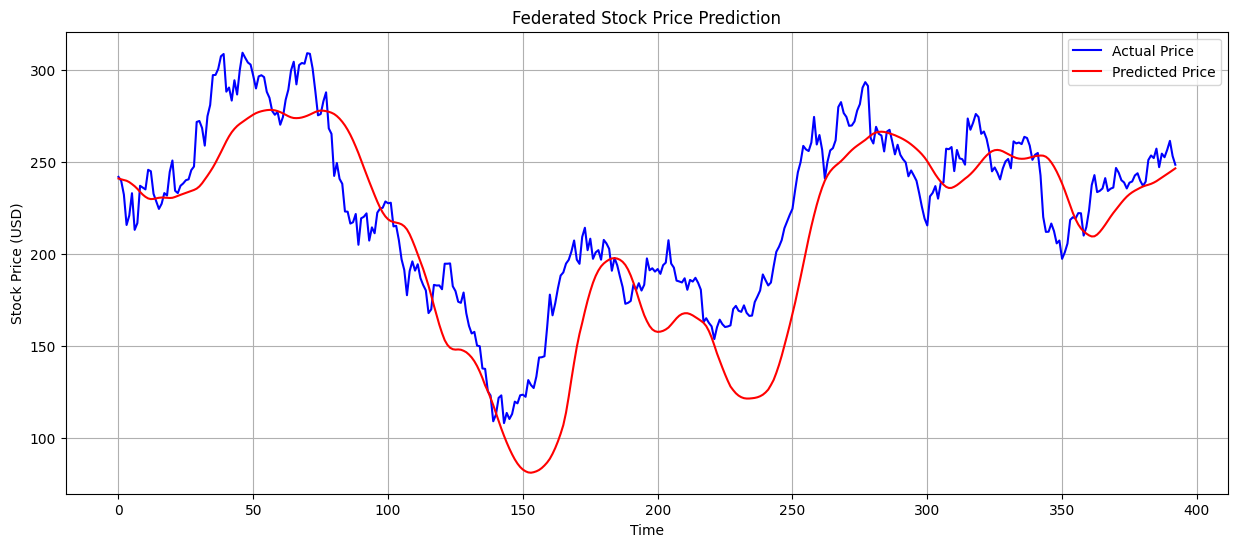

In [1]:
import joblib
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load test data and scaler
X_test_seq = joblib.load("../processed_data/X_test_seq.pkl")
y_test_seq = joblib.load("../processed_data/y_test_seq.pkl")
close_scaler = joblib.load('../processed_data/close_scaler.pkl')

# Load federated model weights
weights = joblib.load("../models/global_model_weights_round_5.pkl")
model = load_model("../models/best_model.h5")
model.set_weights(weights)

# Predict and evaluate
predictions = model.predict(X_test_seq)
predicted_prices = close_scaler.inverse_transform(predictions)
actual_prices = close_scaler.inverse_transform(y_test_seq.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

print("\nFederated Model Results:")
print(f"RMSE: ${rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot results
plt.figure(figsize=(15, 6))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price', color='red')
plt.title('Federated Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()